In [1]:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import altair as alt
alt.data_transformers.enable('json')
import datetime as dt

# Open tilt-corrected datasets and merge

In [2]:
vars = [
    'w_3m_c_fit', 'w_5m_c_fit', 'w_10m_c_fit', 'w_15m_c_fit', 'w_20m_c_fit',
    'u_w__3m_c_fit', 'u_w__5m_c_fit', 'u_w__10m_c_fit', 'u_w__15m_c_fit', 'u_w__20m_c_fit',
    'v_w__3m_c_fit', 'v_w__5m_c_fit', 'v_w__10m_c_fit', 'v_w__15m_c_fit', 'v_w__20m_c_fit',
    'w_tc__3m_c_fit', 'w_tc__5m_c_fit', 'w_tc__10m_c_fit', 'w_tc__15m_c_fit', 'w_tc__20m_c_fit',
    'w_h2o__3m_c_fit', 'w_h2o__5m_c_fit', 'w_h2o__10m_c_fit', 'w_h2o__15m_c_fit', 'w_h2o__20m_c_fit',
]

In [3]:
df_dr = pd.read_parquet("/Users/elischwat/Development/data/sublimationofsnow/double_rotated_30min_despiked_q7/", columns=vars)
df_pf = pd.read_parquet("/Users/elischwat/Development/data/sublimationofsnow/planar_fit_nosector_processed_30min_despiked_q7/", columns=vars)
df_pf10 = pd.read_parquet("/Users/elischwat/Development/data/sublimationofsnow/planar_fit_10sector_processed_30min_despiked_q7/", columns=vars)

In [4]:
df = df_pf10.join(
    df_pf, lsuffix='_pf10', rsuffix='_pf'
).join(
    df_dr.rename(columns = dict([
        (col, col + '_dr') for col in df_dr.columns
    ]))
)

Adjust time series to match the time index of the tidy dataset

In [5]:
df.index = df.index - dt.timedelta(minutes=15)

In [6]:
print(len(df[['w_h2o__3m_c_fit_pf10']].dropna()))
print(len(df[['w_h2o__3m_c_fit_pf']].dropna()))
print(len(df[['w_h2o__3m_c_fit_dr']].dropna()))

10410
10396
10396


# Open tidy dataset and identify 30-min fluxes removed during preprocessing

In [7]:
tidy_df = pd.read_parquet(
    "process_slow_data/tidy_df_20221101_20230619_planar_fit_multiplane_STRAIGHTUP_q7_flags9000.parquet"
)

In [8]:
filter_times_u_w_3m = tidy_df.query("variable == 'u_w__3m_c'")
filter_times_u_w_3m = filter_times_u_w_3m[~np.isnan(filter_times_u_w_3m.value)].time

filter_times_u_w_5m = tidy_df.query("variable == 'u_w__5m_c'")
filter_times_u_w_5m = filter_times_u_w_5m[~np.isnan(filter_times_u_w_5m.value)].time

filter_times_u_w_10m = tidy_df.query("variable == 'u_w__10m_c'")
filter_times_u_w_10m = filter_times_u_w_10m[~np.isnan(filter_times_u_w_10m.value)].time

filter_times_u_w_15m = tidy_df.query("variable == 'u_w__15m_c'")
filter_times_u_w_15m = filter_times_u_w_15m[~np.isnan(filter_times_u_w_15m.value)].time

filter_times_u_w_20m = tidy_df.query("variable == 'u_w__20m_c'")
filter_times_u_w_20m = filter_times_u_w_20m[~np.isnan(filter_times_u_w_20m.value)].time

In [9]:
filter_times_w_tc_3m = tidy_df.query("variable == 'w_tc__3m_c'")
filter_times_w_tc_3m = filter_times_w_tc_3m[~np.isnan(filter_times_w_tc_3m.value)].time

filter_times_w_tc_5m = tidy_df.query("variable == 'w_tc__5m_c'")
filter_times_w_tc_5m = filter_times_w_tc_5m[~np.isnan(filter_times_w_tc_5m.value)].time

filter_times_w_tc_10m = tidy_df.query("variable == 'w_tc__10m_c'")
filter_times_w_tc_10m = filter_times_w_tc_10m[~np.isnan(filter_times_w_tc_10m.value)].time

filter_times_w_tc_15m = tidy_df.query("variable == 'w_tc__15m_c'")
filter_times_w_tc_15m = filter_times_w_tc_15m[~np.isnan(filter_times_w_tc_15m.value)].time

filter_times_w_tc_20m = tidy_df.query("variable == 'w_tc__20m_c'")
filter_times_w_tc_20m = filter_times_w_tc_20m[~np.isnan(filter_times_w_tc_20m.value)].time

In [10]:
filter_times_w_h2o_3m = tidy_df.query("variable == 'w_h2o__3m_c'")
filter_times_w_h2o_3m = filter_times_w_h2o_3m[~np.isnan(filter_times_w_h2o_3m.value)].time

filter_times_w_h2o_5m = tidy_df.query("variable == 'w_h2o__5m_c'")
filter_times_w_h2o_5m = filter_times_w_h2o_5m[~np.isnan(filter_times_w_h2o_5m.value)].time

filter_times_w_h2o_10m = tidy_df.query("variable == 'w_h2o__10m_c'")
filter_times_w_h2o_10m = filter_times_w_h2o_10m[~np.isnan(filter_times_w_h2o_10m.value)].time

filter_times_w_h2o_15m = tidy_df.query("variable == 'w_h2o__15m_c'")
filter_times_w_h2o_15m = filter_times_w_h2o_15m[~np.isnan(filter_times_w_h2o_15m.value)].time

filter_times_w_h2o_20m = tidy_df.query("variable == 'w_h2o__20m_c'")
filter_times_w_h2o_20m = filter_times_w_h2o_20m[~np.isnan(filter_times_w_h2o_20m.value)].time

# Calculate variables

u*

In [11]:
df['u*_3m_c_fit_pf10'] = (df['u_w__3m_c_fit_pf10']**2 + df['v_w__3m_c_fit_pf10']**2)**0.25
df['u*_3m_c_fit_pf'] = (df['u_w__3m_c_fit_pf']**2 + df['v_w__3m_c_fit_pf']**2)**0.25
df['u*_3m_c_fit_dr'] = (df['u_w__3m_c_fit_dr']**2 + df['v_w__3m_c_fit_dr']**2)**0.25

df['u*_5m_c_fit_pf10'] = (df['u_w__5m_c_fit_pf10']**2 + df['v_w__5m_c_fit_pf10']**2)**0.25
df['u*_5m_c_fit_pf'] = (df['u_w__5m_c_fit_pf']**2 + df['v_w__5m_c_fit_pf']**2)**0.25
df['u*_5m_c_fit_dr'] = (df['u_w__5m_c_fit_dr']**2 + df['v_w__5m_c_fit_dr']**2)**0.25

df['u*_10m_c_fit_pf10'] = (df['u_w__10m_c_fit_pf10']**2 + df['v_w__10m_c_fit_pf10']**2)**0.25
df['u*_10m_c_fit_pf'] = (df['u_w__10m_c_fit_pf']**2 + df['v_w__10m_c_fit_pf']**2)**0.25
df['u*_10m_c_fit_dr'] = (df['u_w__10m_c_fit_dr']**2 + df['v_w__10m_c_fit_dr']**2)**0.25

df['u*_15m_c_fit_pf10'] = (df['u_w__15m_c_fit_pf10']**2 + df['v_w__15m_c_fit_pf10']**2)**0.25
df['u*_15m_c_fit_pf'] = (df['u_w__15m_c_fit_pf']**2 + df['v_w__15m_c_fit_pf']**2)**0.25
df['u*_15m_c_fit_dr'] = (df['u_w__15m_c_fit_dr']**2 + df['v_w__15m_c_fit_dr']**2)**0.25

df['u*_20m_c_fit_pf10'] = (df['u_w__20m_c_fit_pf10']**2 + df['v_w__20m_c_fit_pf10']**2)**0.25
df['u*_20m_c_fit_pf'] = (df['u_w__20m_c_fit_pf']**2 + df['v_w__20m_c_fit_pf']**2)**0.25
df['u*_20m_c_fit_dr'] = (df['u_w__20m_c_fit_dr']**2 + df['v_w__20m_c_fit_dr']**2)**0.25

Differences between DR and PF, DR and PF10

In [12]:
for H in [3,5,10,15,20]:
    for prefix in ['w_h2o_', 'w_tc_', 'u*']:
        df[f"{prefix}_{H}m_c_fit_dr_minus_pf"] = (df[f"{prefix}_{H}m_c_fit_dr"] - df[f"{prefix}_{H}m_c_fit_pf"])
        df[f"{prefix}_{H}m_c_fit_dr_minus_pf10"] = (df[f"{prefix}_{H}m_c_fit_dr"] - df[f"{prefix}_{H}m_c_fit_pf10"])
        

# Convert heat fluxes to watts/m^2

In [13]:
from metpy.units import units
def w_tc_to_watts(values):
    specific_heat_capacity_air = 1.0005 * units('kilojoules/(K*kg)')
    air_density = 1 * units("kg/m^3")
    sensible_heat_flux_meas_units = values * units("K*m/s")
    return (sensible_heat_flux_meas_units * specific_heat_capacity_air * air_density).to("W/m^2").magnitude
def w_h2o_to_watts(values):
    latent_heat_of_vaporization = 2838 * units("J/g")
    latent_heat_flux_meas_units = values * units("g/(m^2 * s)")
    return (latent_heat_flux_meas_units * latent_heat_of_vaporization).to("W/m^2").magnitude

In [14]:
for var in [c for c in df.columns if 'w_tc__' in c]:\
    df[var] = w_tc_to_watts(df[var].values)
for var in [c for c in df.columns if 'w_h2o__' in c]:\
    df[var] = w_h2o_to_watts(df[var].values)

# Plots

## Vertical velocities

In [15]:
from sublimpy import utils

In [16]:
upvalley_wind_times = pd.to_datetime(tidy_df[tidy_df.variable == 'dir_3m_c'].query("value < 152").query("value > 92").time.values)
downvalley_wind_times = pd.to_datetime(tidy_df[tidy_df.variable == 'dir_3m_c'].query("value < 342").query("value > 292").time.values)
# Identify lists of timestamps for different categories
bs_times = pd.to_datetime(list(set(
    tidy_df.query("variable == 'SF_avg_1m_ue'").query("value > 0").time.values
).union(
    set(tidy_df.query("variable == 'SF_avg_2m_ue'").query("value > 0").time.values)
)))
nobs_times = pd.to_datetime(list(set(tidy_df.time).difference(bs_times)))

In [35]:
df_localtime = utils.modify_df_timezone(df.reset_index(), 'UTC', 'US/Mountain')
df_localtime = df_localtime[df_localtime.time > '20221130']
df_localtime = df_localtime[df_localtime.time < '20230510']
df_localtime_upvalley = df_localtime[df_localtime.time.isin(set(upvalley_wind_times).intersection(set(nobs_times)))]
df_localtime_downvalley = df_localtime[df_localtime.time.isin(set(downvalley_wind_times).intersection(set(nobs_times)))]
def w_chart(src, columns):
    return alt.Chart(
            src
        ).transform_fold(
            columns,
            as_ = ['measurement', 'velocity']
        ).mark_line().encode(
            alt.X('hoursminutes(time):T'),
            alt.Y('median(velocity):Q'),
            alt.Color('measurement:N')
        ).properties(width=300, height = 100)
(
    (
        w_chart(df_localtime_upvalley, ['w_3m_c_fit_pf10', 'w_3m_c_fit_pf', 'w_3m_c_fit_dr']) &\
        w_chart(df_localtime_upvalley, ['w_5m_c_fit_pf10', 'w_5m_c_fit_pf', 'w_5m_c_fit_dr']) &\
        w_chart(df_localtime_upvalley, ['w_10m_c_fit_pf10', 'w_10m_c_fit_pf', 'w_10m_c_fit_dr']) &\
        w_chart(df_localtime_upvalley, ['w_15m_c_fit_pf10', 'w_15m_c_fit_pf', 'w_15m_c_fit_dr']) &\
        w_chart(df_localtime_upvalley, ['w_20m_c_fit_pf10', 'w_20m_c_fit_pf', 'w_20m_c_fit_dr'])
    ).resolve_scale(color='independent', x='shared', y='shared')
    |
    (
        w_chart(df_localtime_downvalley, ['w_3m_c_fit_pf10', 'w_3m_c_fit_pf', 'w_3m_c_fit_dr']) &\
        w_chart(df_localtime_downvalley, ['w_5m_c_fit_pf10', 'w_5m_c_fit_pf', 'w_5m_c_fit_dr']) &\
        w_chart(df_localtime_downvalley, ['w_10m_c_fit_pf10', 'w_10m_c_fit_pf', 'w_10m_c_fit_dr']) &\
        w_chart(df_localtime_downvalley, ['w_15m_c_fit_pf10', 'w_15m_c_fit_pf', 'w_15m_c_fit_dr']) &\
        w_chart(df_localtime_downvalley, ['w_20m_c_fit_pf10', 'w_20m_c_fit_pf', 'w_20m_c_fit_dr'])
    ).resolve_scale(color='independent', x='shared', y='shared')
)

alt.HConcatChart(...)

In [18]:
(
        w_chart(df_localtime, ['w_3m_c_fit_pf10', 'w_3m_c_fit_pf', 'w_3m_c_fit_dr']) &\
        w_chart(df_localtime, ['w_5m_c_fit_pf10', 'w_5m_c_fit_pf', 'w_5m_c_fit_dr']) &\
        w_chart(df_localtime, ['w_10m_c_fit_pf10', 'w_10m_c_fit_pf', 'w_10m_c_fit_dr']) &\
        w_chart(df_localtime, ['w_15m_c_fit_pf10', 'w_15m_c_fit_pf', 'w_15m_c_fit_dr']) &\
        w_chart(df_localtime, ['w_20m_c_fit_pf10', 'w_20m_c_fit_pf', 'w_20m_c_fit_dr'])
    ).resolve_scale(color='independent', x='shared', y='shared')

alt.VConcatChart(...)

## Fluxes

### Exploratory

#### u*

In [ ]:
base = alt.Chart(df).properties(width=150, height=150)
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('u*_3m_c_fit_dr:Q'),
        alt.Y('u*_3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('u*_3m_c_fit_dr:Q').bin(True),
        alt.Y('u*_3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('u*_3m_c_fit_dr:Q').bin(True),
        alt.Y('mean(u*_3m_c_fit_dr_minus_pf10):Q'),
    )
) &\
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('u*_20m_c_fit_dr:Q'),
        alt.Y('u*_20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('u*_20m_c_fit_dr:Q').bin(True),
        alt.Y('u*_20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('u*_20m_c_fit_dr:Q').bin(True),
        alt.Y('mean(u*_20m_c_fit_dr_minus_pf10):Q'),
    )
)

#### w'tc'

In [ ]:
alt.Chart(df[df.index.isin(filter_times_w_tc_3m)]).mark_bar().encode(
    alt.X('w_tc__3m_c_fit_dr:Q').bin(step=20),
    alt.Y('count(w_tc__3m_c_fit_d|r):Q')
)

In [ ]:
base = alt.Chart(df).properties(width=150, height=150)
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('w_tc__3m_c_fit_dr:Q'),
        alt.Y('w_tc__3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('w_tc__3m_c_fit_dr:Q').bin(True),
        alt.Y('w_tc__3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_tc__3m_c_fit_dr:Q').bin(True),
        alt.Y('mean(w_tc__3m_c_fit_dr_minus_pf10):Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_tc__3m_c_fit_dr:Q').bin(True),
        alt.Y('median(w_tc__3m_c_fit_dr_minus_pf10):Q'),
    )
) &\
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('w_tc__20m_c_fit_dr:Q'),
        alt.Y('w_tc__20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('w_tc__20m_c_fit_dr:Q').bin(True),
        alt.Y('w_tc__20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_tc__20m_c_fit_dr:Q').bin(True),
        alt.Y('mean(w_tc__20m_c_fit_dr_minus_pf10):Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_tc__20m_c_fit_dr:Q').bin(True),
        alt.Y('median(w_tc__20m_c_fit_dr_minus_pf10):Q'),
    )
)

#### w'q'

In [ ]:
alt.Chart(
    df[df.index.isin(filter_times_w_h2o_3m.values)].query('w_h2o__3m_c_fit_dr > -400')
).mark_bar().encode(
    alt.X('w_h2o__3m_c_fit_dr:Q').bin(step=10),
    alt.Y('count(w_h2o__3m_c_fit_dr):Q')
)

In [ ]:
alt.Chart(
    df.query("w_h2o__3m_c_fit_dr > -20").query("w_h2o__3m_c_fit_dr < 80")
).mark_bar().encode(
    alt.X('w_h2o__3m_c_fit_dr:Q').bin(step=5),
    alt.Y('count(w_h2o__3m_c_fit_dr):Q')
)

In [ ]:
base = alt.Chart(df).properties(width=150, height=150)
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('w_h2o__3m_c_fit_dr:Q'),
        alt.Y('w_h2o__3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('w_h2o__3m_c_fit_dr:Q').bin(True),
        alt.Y('w_h2o__3m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_h2o__3m_c_fit_dr:Q').bin(True),
        alt.Y('mean(w_h2o__3m_c_fit_dr_minus_pf10):Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_h2o__3m_c_fit_dr:Q').bin(True),
        alt.Y('median(w_h2o__3m_c_fit_dr_minus_pf10):Q'),
    )
) &\
(
    base.mark_circle(size=5, opacity=0.25).encode(
        alt.X('w_h2o__20m_c_fit_dr:Q'),
        alt.Y('w_h2o__20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_boxplot(outliers=False).encode(
        alt.X('w_h2o__20m_c_fit_dr:Q').bin(True),
        alt.Y('w_h2o__20m_c_fit_dr_minus_pf10:Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_h2o__20m_c_fit_dr:Q').bin(True),
        alt.Y('mean(w_h2o__20m_c_fit_dr_minus_pf10):Q'),
    ) |\
    base.mark_circle().encode(
        alt.X('w_h2o__20m_c_fit_dr:Q').bin(True),
        alt.Y('median(w_h2o__20m_c_fit_dr_minus_pf10):Q'),
    )
)

### Final plots

In [19]:
def get_boxplot(
        src, 
        variable,
        limits,
        y_domain,
        text_y_loc,
        bins,
        bin_labels,
    ):
    src = src[
            (src[f"{variable}"] > limits[0]) & (src[f"{variable}"] < limits[1])
        ]
    src[f'{variable}_bin'] = pd.cut(
            src[f'{variable}'],
            bins,
            labels = bin_labels
        )
    base = alt.Chart(
            src
        ).transform_fold([
            f"{variable}_minus_pf", f"{variable}_minus_pf10"
        ]).encode(
            alt.X(f'{variable}_bin:O'),
            # alt.XOffset("key:N"),
        ).properties(height = 133, width=300)
    boxes = base.encode(   
            alt.Y(f'value:Q').title(f'diff'),
            alt.Color("key:N"),
            alt.XOffset("key:N"),
        ).mark_boxplot(outliers=False, box={'size': 12}, ticks=False)
    mean_dots = base.encode(
            alt.Y(f'mean(value):Q').title(f'diff'),
            alt.XOffset("key:N"),
        ).mark_circle(color='black')
    text = base.transform_calculate(y=text_y_loc).encode(
            alt.Y(f'y:Q').scale(domain=y_domain, nice=False),
            alt.Text(f'count({variable}_minus_pf10)'),
        ).mark_text(align='center', baseline='bottom', size=12)
    return boxes + mean_dots + text

#### u*

In [20]:
def ustar_boxplot(
        src,
        variable = 'u*_3m_c_fit_dr', 
        limits = [0, 0.8], 
        y_domain = [-0.3, 0.6], 
        text_y_loc = '0.6', 
        bins = np.linspace(0,0.8,9), 
        bin_labels = np.round(np.linspace(0.05, 0.75, 8), 2)
): 
    return get_boxplot( src,  variable, limits, y_domain, text_y_loc, bins, bin_labels)

In [22]:
ustar_chart = (
    ustar_boxplot(df[df.index.isin(filter_times_u_w_3m)], variable = 'u*_3m_c_fit_dr') &
    ustar_boxplot(df[df.index.isin(filter_times_u_w_5m)], variable = 'u*_5m_c_fit_dr') &
    ustar_boxplot(df[df.index.isin(filter_times_u_w_10m)], variable = 'u*_10m_c_fit_dr') &
    ustar_boxplot(df[df.index.isin(filter_times_u_w_15m)], variable = 'u*_15m_c_fit_dr') &
    ustar_boxplot(df[df.index.isin(filter_times_u_w_20m)], variable = 'u*_20m_c_fit_dr')
).resolve_scale(
    color='independent', xOffset='independent',
    x='shared', y='shared'
)

In [23]:
ustar_chart.save("ustar_chart.png")

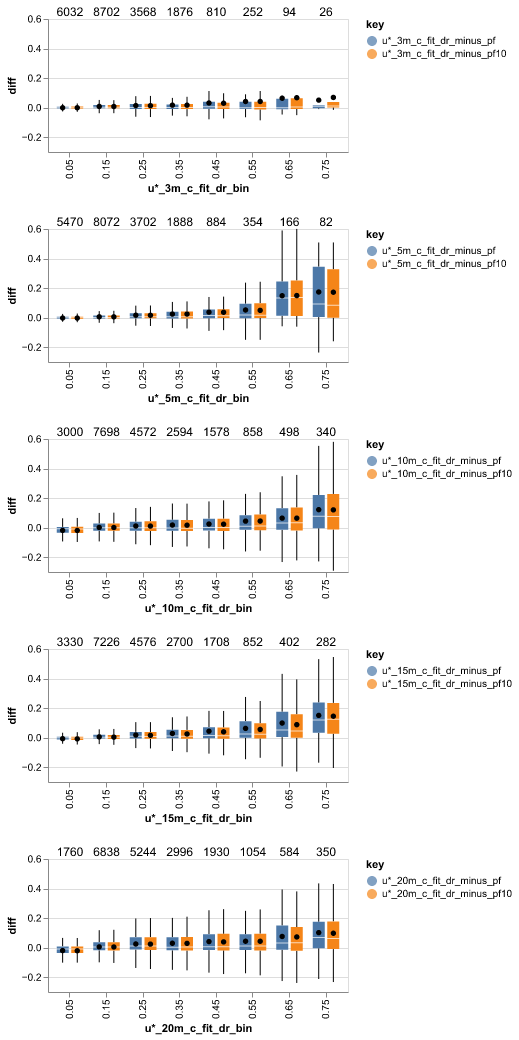

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="ustar_chart.png")

#### w'tc'

In [25]:
def w_tc_boxplot(
        src,
        variable = 'w_tc__3m_c_fit_dr', 
        limits = [-150, 100],
        y_domain = [-75, 25], 
        text_y_loc = '25', 
        bins = np.linspace(-150, 100, 6),
        bin_labels = np.array([
                np.linspace(-150, 100, 6)[:-1], 
                np.linspace(-150, 100, 6)[1:]
        ]).mean(axis=0)
): 
    return get_boxplot( src,  variable, limits, y_domain, text_y_loc, bins, bin_labels)

def w_tc_stable_boxplot(
        src,
        variable = 'w_tc__3m_c_fit_dr', 
        limits = [-150, 0],
        y_domain = [-100, 50], 
        text_y_loc = '50', 
        bins = np.linspace(-150, 0, 7),
        bin_labels = np.array([
                np.linspace(-150, 0, 7)[:-1], 
                np.linspace(-150, 0, 7)[1:]
        ]).mean(axis=0)
): 
    return get_boxplot( src,  variable, limits, y_domain, text_y_loc, bins, bin_labels)

def w_tc_unstable_boxplot(
        src,
        variable = 'w_tc__3m_c_fit_dr', 
        limits = [0, 100],
        y_domain = [-25, 25], 
        text_y_loc = '25', 
        bins = np.linspace(0, 100, 5),
        bin_labels = np.array([
                np.linspace(0, 100, 5)[:-1], 
                np.linspace(0, 100, 5)[1:]
        ]).mean(axis=0)
): 
    return get_boxplot( src,  variable, limits, y_domain, text_y_loc, bins, bin_labels)

In [26]:
w_tc_unstable_chart = (
    (
        w_tc_unstable_boxplot(df[df.index.isin(filter_times_w_tc_3m)], variable = 'w_tc__3m_c_fit_dr') &
        w_tc_unstable_boxplot(df[df.index.isin(filter_times_w_tc_5m)], variable = 'w_tc__5m_c_fit_dr') &
        w_tc_unstable_boxplot(df[df.index.isin(filter_times_w_tc_10m)], variable = 'w_tc__10m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared') | (
        w_tc_unstable_boxplot(df[df.index.isin(filter_times_w_tc_15m)], variable = 'w_tc__15m_c_fit_dr') &
        w_tc_unstable_boxplot(df[df.index.isin(filter_times_w_tc_20m)], variable = 'w_tc__20m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')
).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')

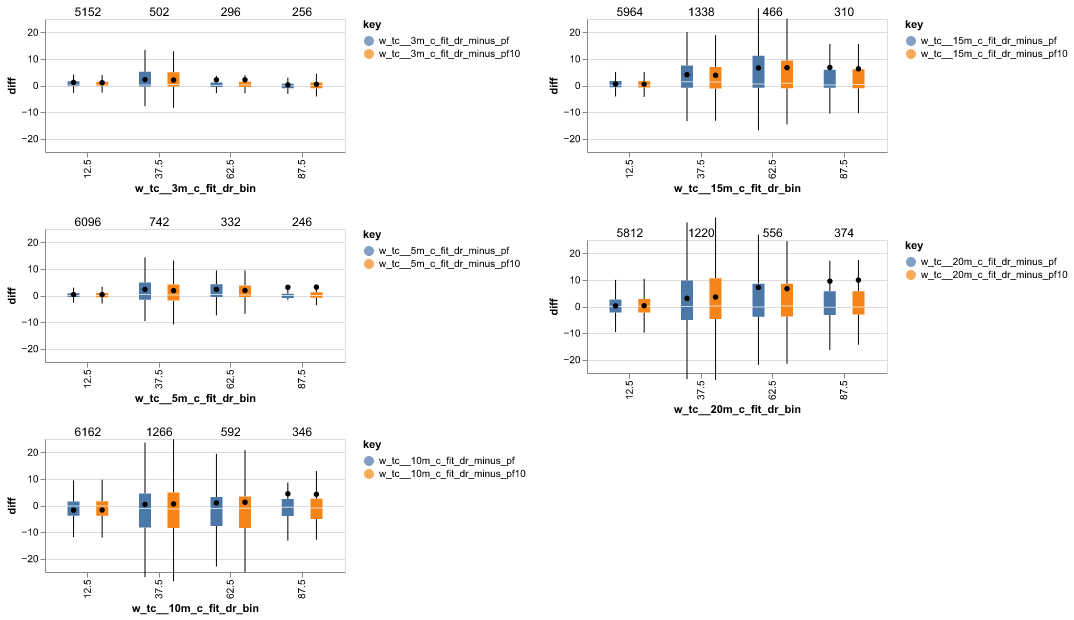

In [27]:
w_tc_unstable_chart.save("w_tc_unstable_chart.png")
Image(filename="w_tc_unstable_chart.png")

In [28]:
w_tc_stable_chart = (
    (
        w_tc_boxplot(df[df.index.isin(filter_times_w_tc_3m)], variable = 'w_tc__3m_c_fit_dr') &
        w_tc_boxplot(df[df.index.isin(filter_times_w_tc_5m)], variable = 'w_tc__5m_c_fit_dr') &
        w_tc_boxplot(df[df.index.isin(filter_times_w_tc_10m)], variable = 'w_tc__10m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared') | (
        w_tc_boxplot(df[df.index.isin(filter_times_w_tc_15m)], variable = 'w_tc__15m_c_fit_dr') &
        w_tc_boxplot(df[df.index.isin(filter_times_w_tc_20m)], variable = 'w_tc__20m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')
).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')

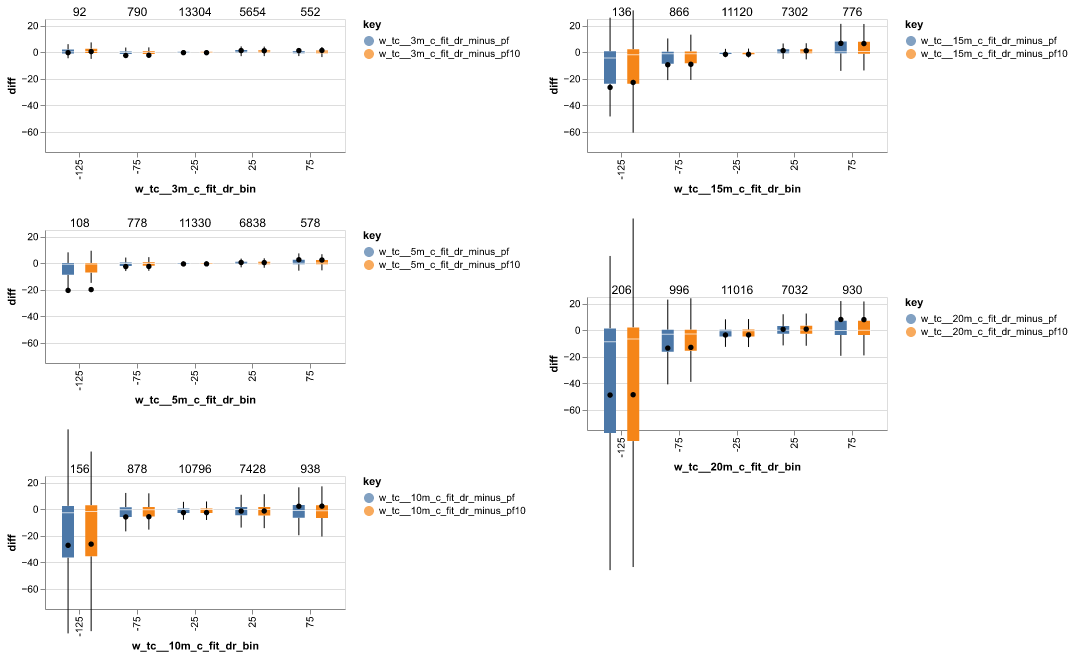

In [29]:
w_tc_stable_chart.save("w_tc_stable_chart.png")
Image(filename="w_tc_stable_chart.png")

#### w'q'

In [30]:
def w_h2o_boxplot(
        src,
        variable = 'w_h2o__3m_c_fit_dr', 
        limits = [-20, 80], 
        y_domain = [-10, 10],
        text_y_loc = '10', 
        bins = np.linspace(-20,80, 6),
        bin_labels = np.array([
                np.linspace(-20,80, 6)[:-1], 
                np.linspace(-20,80, 6)[1:]
        ]).mean(axis=0)
        # bins = np.linspace(0,80, 9),
        # bin_labels = np.array([
        #         np.linspace(0,80, 9)[:-1], 
        #         np.linspace(0,80, 9)[1:]
        # ]).mean(axis=0)
): 
    return get_boxplot( src,  variable, limits, y_domain, text_y_loc, bins, bin_labels)

In [31]:
w_h2o_chart = (
    (
        w_h2o_boxplot(df[df.index.isin(filter_times_w_h2o_3m.values)].query('w_h2o__3m_c_fit_dr > -400'), variable = 'w_h2o__3m_c_fit_dr') &
        w_h2o_boxplot(df[df.index.isin(filter_times_w_h2o_5m.values)].query('w_h2o__5m_c_fit_dr > -400'), variable = 'w_h2o__5m_c_fit_dr') &
        w_h2o_boxplot(df[df.index.isin(filter_times_w_h2o_10m.values)].query('w_h2o__10m_c_fit_dr > -400'), variable = 'w_h2o__10m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared') | (
        w_h2o_boxplot(df[df.index.isin(filter_times_w_h2o_15m.values)].query('w_h2o__15m_c_fit_dr > -400'), variable = 'w_h2o__15m_c_fit_dr') &
        w_h2o_boxplot(df[df.index.isin(filter_times_w_h2o_20m.values)].query('w_h2o__20m_c_fit_dr > -400'), variable = 'w_h2o__20m_c_fit_dr')
    ).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')
).resolve_scale(color='independent', xOffset='independent', x='shared', y='shared')

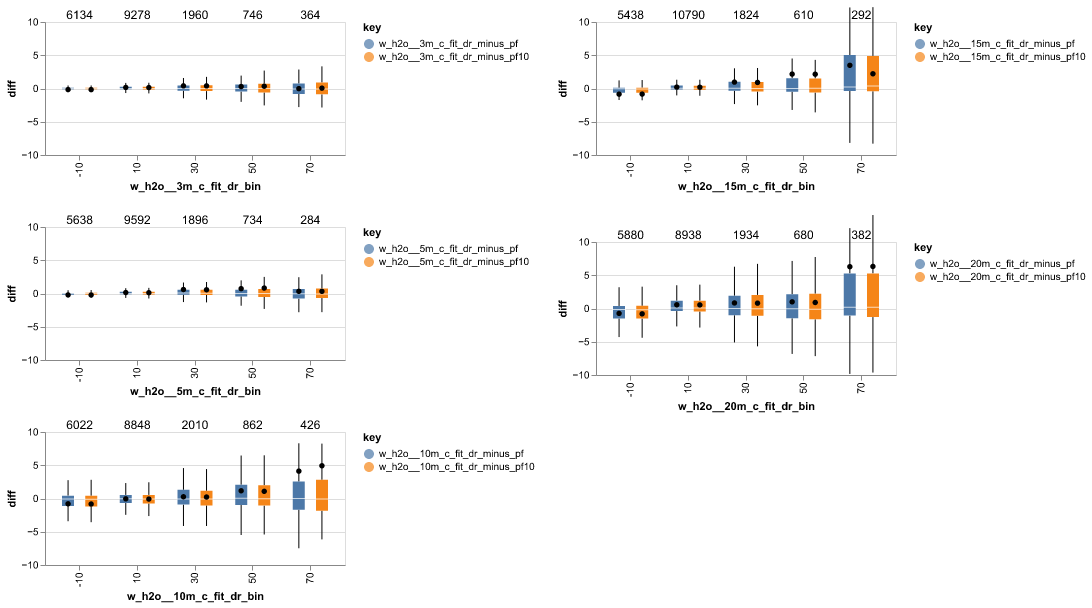

In [32]:
w_h2o_chart.save("w_h2o_chart.png")
Image(filename="w_h2o_chart.png")